c:\Users\trzci\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


['Day of the week [-]', 'Temp [C]', 'Humidity [%]', 'Wind [m/s]', 'Clouds [1/8]', 'SUM - Entry [GWh/d]', 'SUM - Exit [GWh/d]', 'SUM - Exit t-1d [GWh/d]', 'Storage t-1d [GWh/d]', 'Storage [GWh/d]', 'day', 'month', 'year']
Epoch 0 of 1000
Epoch loss: 0.10525209194532147
Epoch 1 of 1000
Epoch loss: 0.07263771968859213
Epoch 2 of 1000
Epoch loss: 0.070668568558715
Epoch 3 of 1000
Epoch loss: 0.06670179259445932
Epoch 4 of 1000
Epoch loss: 0.06547134217840654
Epoch 5 of 1000
Epoch loss: 0.06450568898408501
Epoch 6 of 1000
Epoch loss: 0.06353784104188283
Epoch 7 of 1000
Epoch loss: 0.06293170223081554
Epoch 8 of 1000
Epoch loss: 0.06245272054716393
Epoch 9 of 1000
Epoch loss: 0.061985702288371546
Epoch 10 of 1000
Epoch loss: 0.06103041202381805
Epoch 11 of 1000
Epoch loss: 0.05688397931279959
Epoch 12 of 1000
Epoch loss: 0.05169482046255359
Epoch 13 of 1000
Epoch loss: 0.04797613510379085
Epoch 14 of 1000
Epoch loss: 0.04498164024617937
Epoch 15 of 1000
Epoch loss: 0.04327813611814269
Epoch 

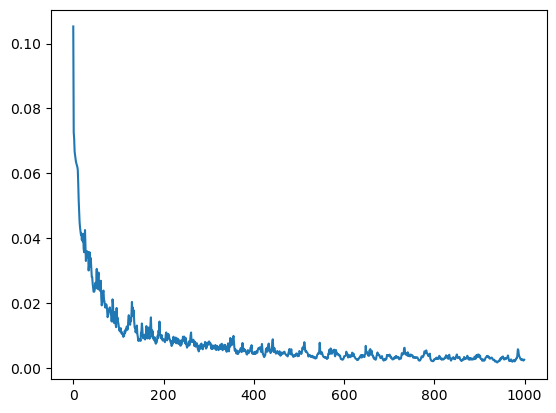

R^2 tensor(0.9031)


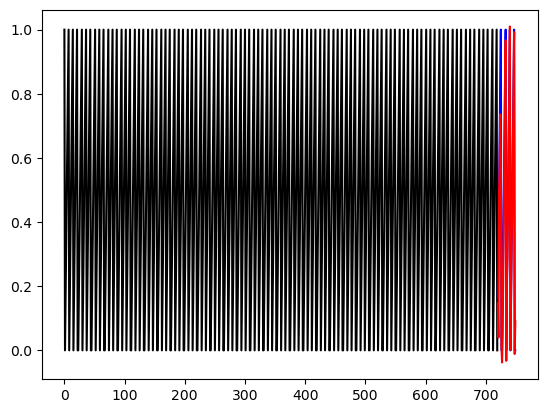

R^2 tensor(0.0157)


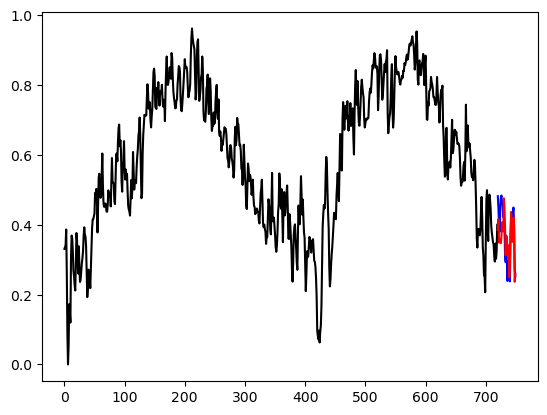

R^2 tensor(0.5628)


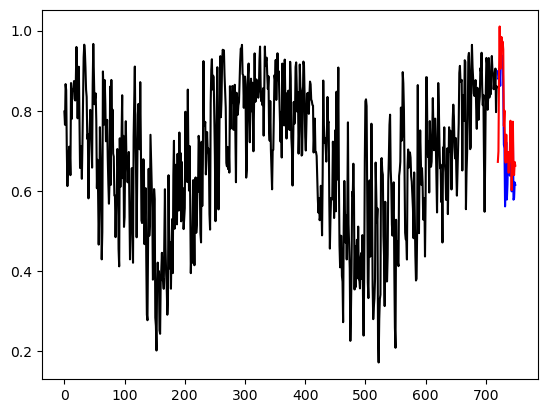

R^2 tensor(0.7328)


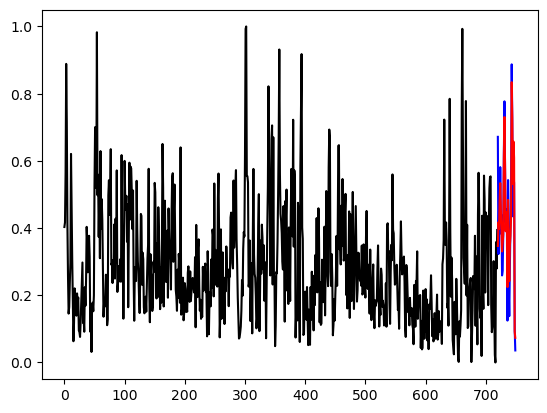

R^2 tensor(0.6458)


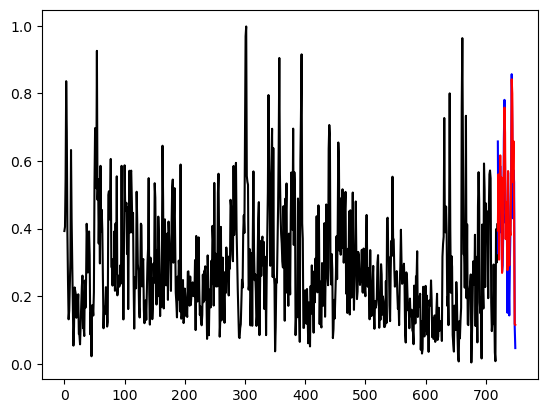

R^2 tensor(0.6161)


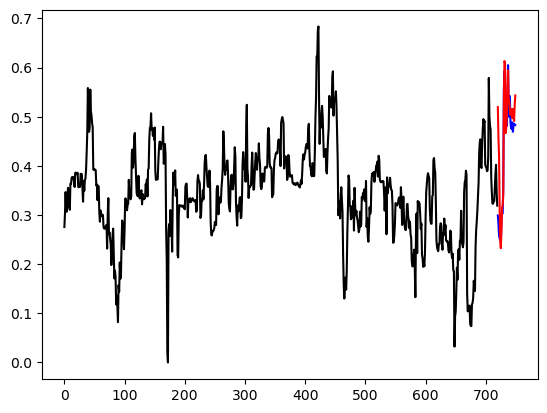

R^2 tensor(0.2158)


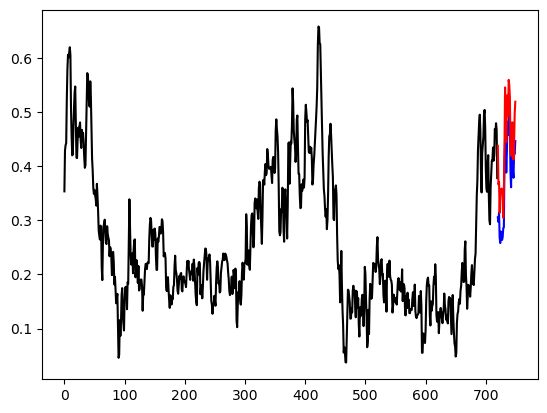

R^2 tensor(-0.6078)


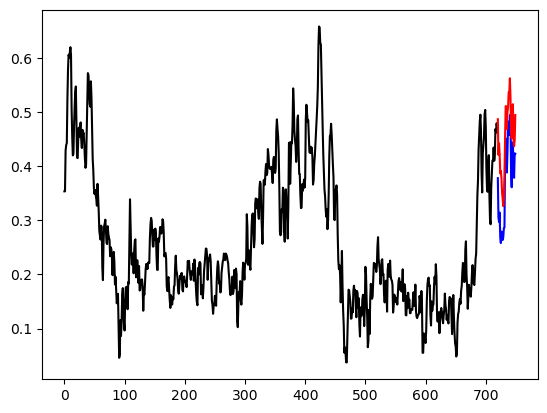

R^2 tensor(0.4905)


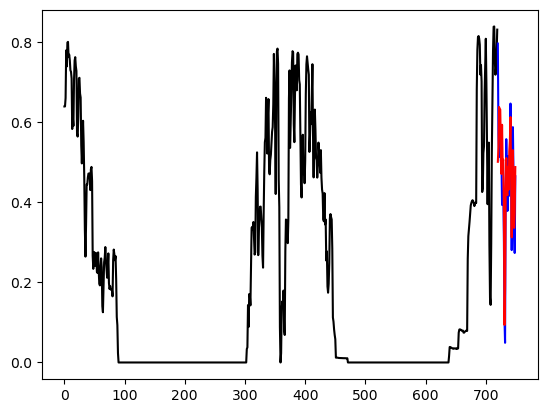

R^2 tensor(-0.1996)


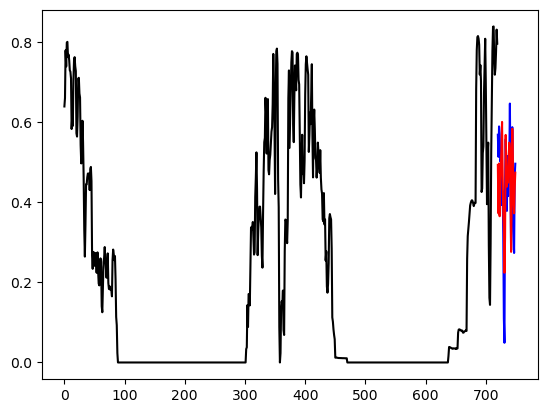

R^2 tensor(0.8363)


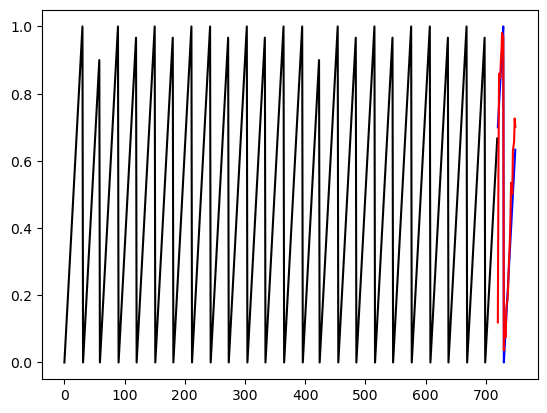

R^2 tensor(0.7188)


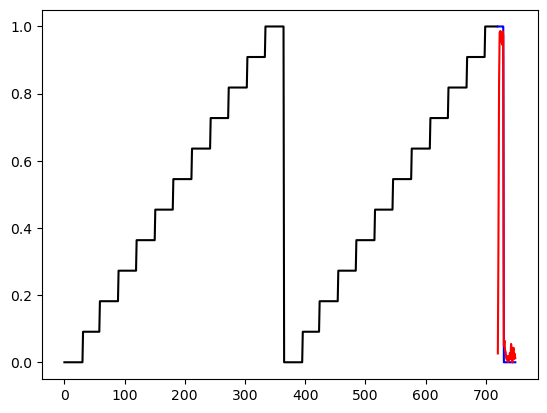

R^2 tensor(-0.8273)


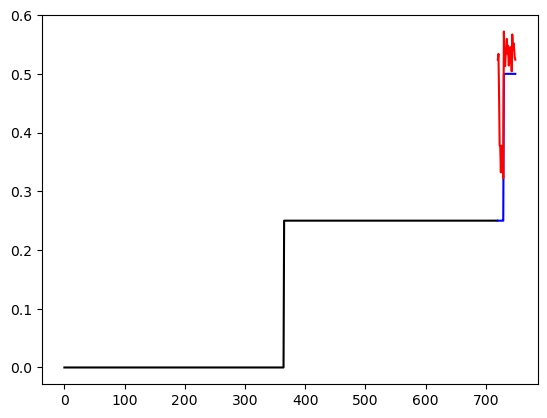

In [1]:
import pandas as pd

import torch
from torch import nn
from torch import Tensor
import math
import configparser
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch import cuda
import series_transformer as st

dataset = st.CustomDataSet('Avg_data.csv',window_length=720,prediction_window=30)

params = st.ParameterProvider("series.config")
t1 = st.Transformer(params)
device_id = torch.cuda.current_device()
t1.cuda(device_id)
train_dataset, test_dataset = dataset.getSets()
_, loss_history = st.train_cuda(t1,train_dataset,device_id,epochs=1000,verbose_delay=-1)
plt.plot(loss_history)
print(loss_history)
plt.show()
for i in range(13):
    st.output_and_show(t1,train_dataset[0][0],train_dataset[0][2],device_id,i)

R^2 tensor(0.9748)


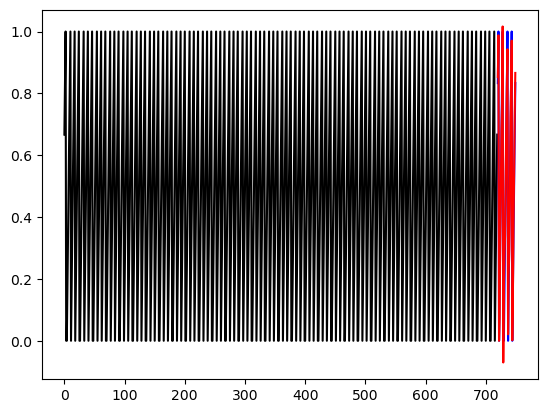

R^2 tensor(-4.4324)


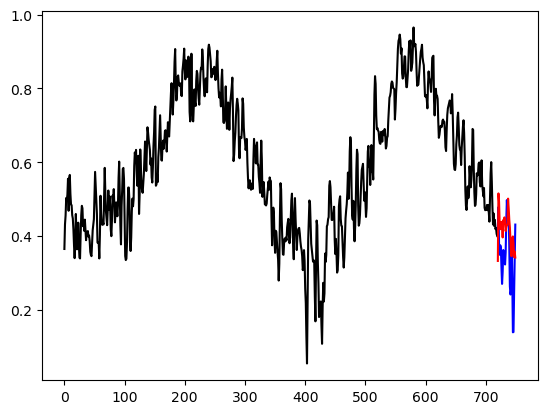

R^2 tensor(-1.5522)


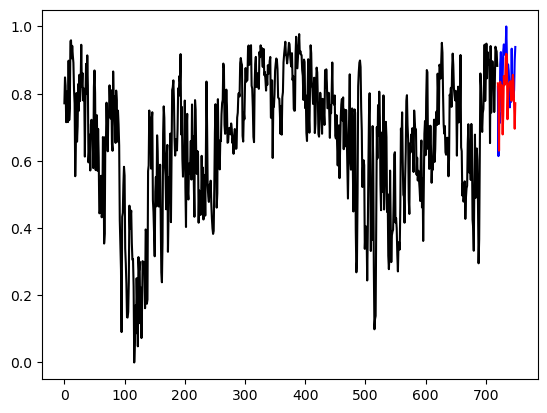

R^2 tensor(-2.5327)


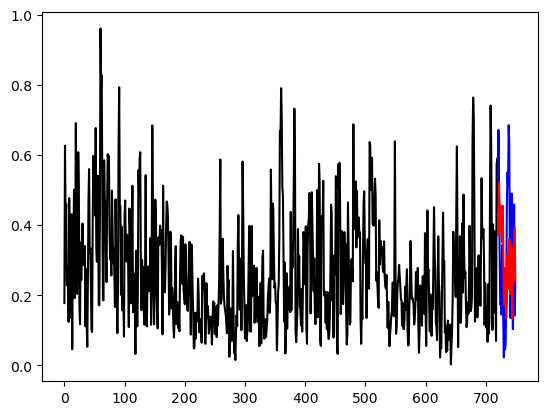

R^2 tensor(-2.6415)


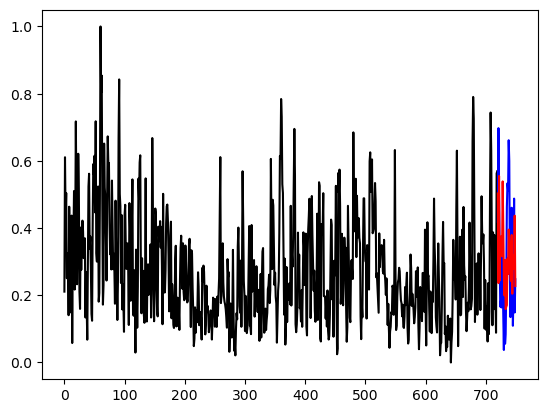

R^2 tensor(-5.7151)


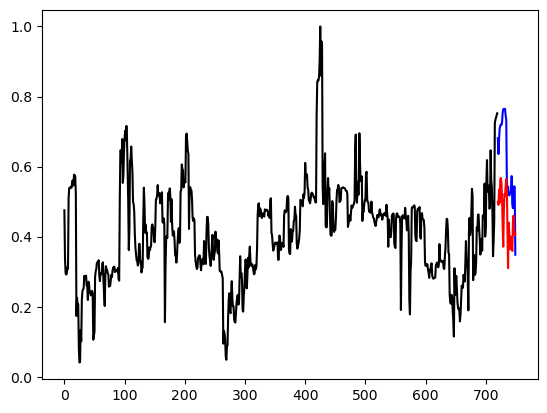

R^2 tensor(-2.1689)


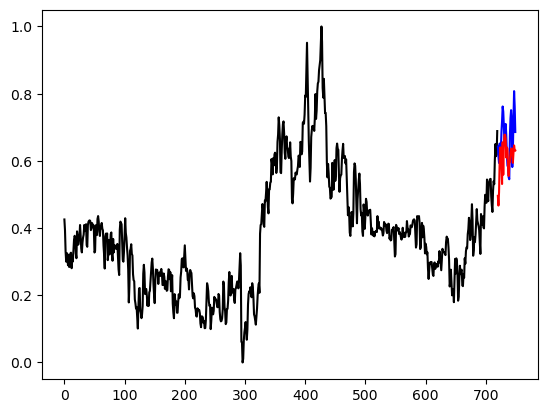

R^2 tensor(-3.0701)


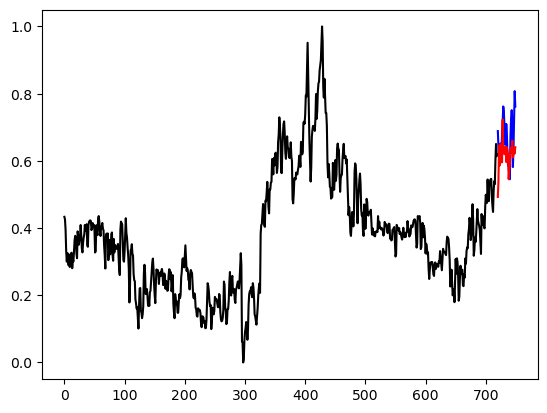

R^2 tensor(0.4652)


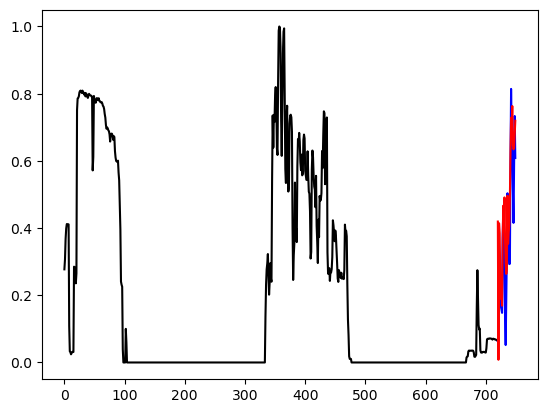

R^2 tensor(0.3335)


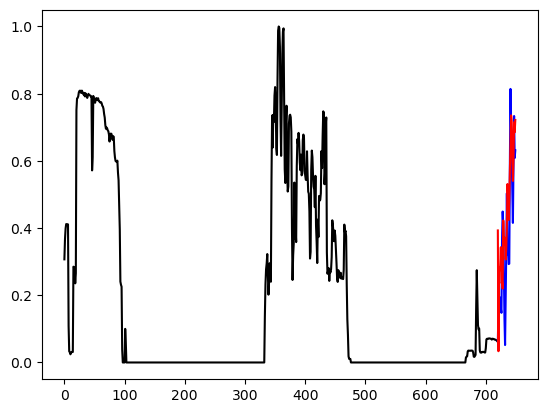

R^2 tensor(0.5858)


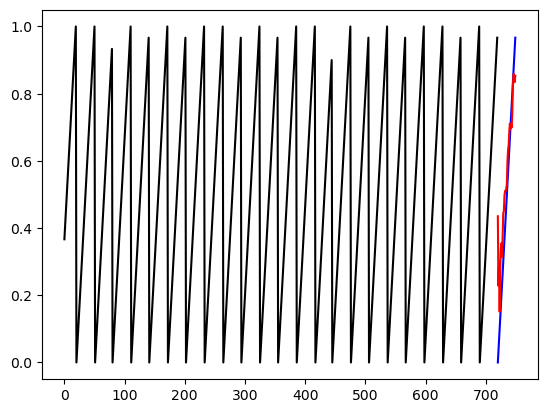

R^2 tensor(-3.1507)


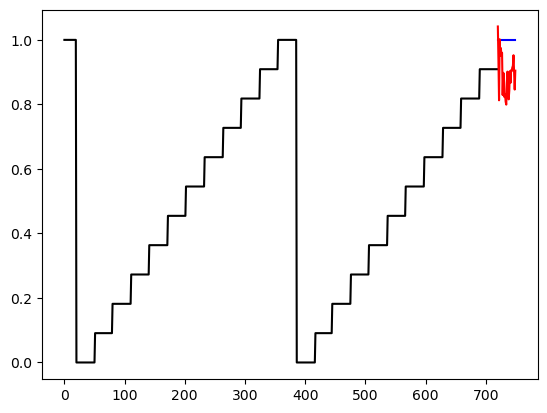

R^2 tensor(-18.3089)


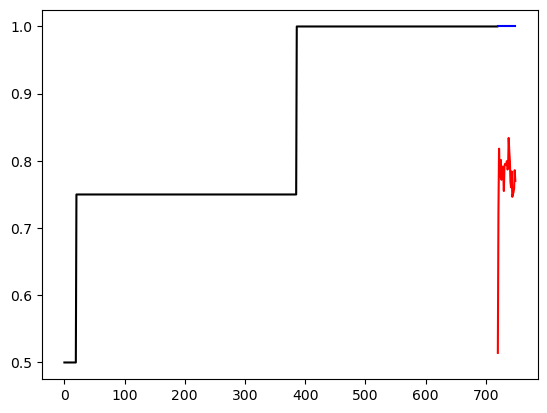

In [2]:
for i in range(13):
    st.output_and_show(t1,test_dataset[-1][0],test_dataset[-1][2],device_id,i)

Day of the week [-],Temp [C],Humidity [%],Wind [m/s],Clouds [1/8],SUM - Entry [GWh/d],SUM - Exit [GWh/d],SUM - Exit t-1d [GWh/d],Storage t-1d [GWh/d],Storage [GWh/d]


In [3]:
import pickle

In [4]:
dumpfile = open('1000epochs-19-05-1.dump','wb')

In [5]:
pickle.dump(t1,dumpfile)

In [6]:
dumpfile.close()

In [ ]:
torch.save(t1, 't1-19-05-1.dump')